## Recursion Memoization & Dynamic Programming

- Essentially recursion, recursion memoization, and DP are various methods to solve problems, from the worst to the best possible way

- Recursion is simple to implement for problems with the nature of subproblems (ie solving solving sub problems can solve the main problem). 
Main Problem --> sub_prob A --> sub_prob B --> .... --> sub problem Z. Solving the answer for Z and working backwards to solve the main problem.

- This method above is simple to implement but very inefficient. This is because in the recursion, you might solving the same sub problem multiple times.

- For example, the main problem can be broken down like this:  Main Problem = Sub A + Sub B = (Sub B + Sub C) + (Sub C + Sub D) ...... In this equation, Sub A can be broken down to (Sub B + Sub C) and Sub B can be broken down into (Sub C + Sub D). Each will therefore follow their respective chain/tree until they
reach a single Sub problem. Therefore by looking at the first equation you can see that Sub C is being solved twice. This is where all the inefficiences arise from. Same problems being solved during the recursion.

- To solve this, we use a technique called 'memoization' --> Here, we note down in our program what problems are solved (in a list etc), and 
cross refer to that list when solving problems. If Sub Problem T is about to being solved, but its on the list, the program would not solve it as it was already solved in a previous recursion/iteration etc.

- This technique mentioned above makes recursion more efficient.

- However, to make the algorithm even more efficient, we use the 'Dynamic Programming' technique (tabulation)  --> https://www.youtube.com/watch?v=P-mMvhfJhu8&ab_channel=Daniel

- 


In [18]:
### Longest subsequenece

### Method 1 --> using recursion solely

### If you work out the solutions slowly, you will see that there are repeat solutions that need to be solved

def longest_sub_seq_recursion(string_a,string_b):

    
    if len(string_a) == 0 or len(string_b) == 0 :
        return 0

    elif string_a[0] == string_b[0]:
        string_a = string_a[1:]
        string_b = string_b[1:] 
        return 1 + longest_sub_seq_recursion(string_a,string_b)
    
    else:
        
        return max(longest_sub_seq_recursion(string_a[1:],string_b),longest_sub_seq_recursion(string_a,string_b[1:]))



print(longest_sub_seq_recursion('dense','condensed'))


5


In [44]:
### Longest subsequenece

### Method 2 --> using recursion + memoization --> this is a technique to make recursion more efficient

### Store the solutions for each subproblem in a list so that it does not have to be solved multiple times

### Need to understand the table matrix method to solve this --> ie you will fill the table with certain values --> the highest value is the sub sequence
### length answer. 

import numpy as np

def longest_sub_seq_memoization(string_a,string_b,len_a,len_b,memo):

    #print(len_a,len_b)
    
    # Reached the end of the string
    if len_a == 0 or len_b == 0:
        return 0
   
    # has been solved --> return index value
    if memo[len_a][len_b] != -1:

        return memo[len_a][len_b]
    
    # check last letter
    # If equal, go on to the next letter for both strings (from the back)
    if string_a[len_a - 1] == string_b[len_b - 1]:
        memo[len_a][len_b] = 1 + longest_sub_seq_memoization(string_a,string_b,(len_a - 1),(len_b - 1),memo)
    
    # If not equal, we will take the max of each recursion brach and sum it up to see which branch has the highest value
    else:
        recursion_string_a = longest_sub_seq_memoization(string_a,string_b,(len_a - 1),len_b,memo)
        recursion_string_b = longest_sub_seq_memoization(string_a,string_b,len_a,(len_b - 1),memo)
        memo[len_a][len_b]=  max(recursion_string_a,recursion_string_b)
          
  
    return memo[len_a][len_b]


def longest_sub_seq_cache(string_a,string_b):

    len_a = len(string_a)
    len_b = len(string_b)

    # Create an array filled with -1
    
    memo = np.zeros(((len_a+1), (len_b+1)), dtype=int) 
    memo.fill(-1)
    print(memo)

    return longest_sub_seq_memoization(string_a,string_b,len_a,len_b,memo)   

 
print(longest_sub_seq_cache('dense','condensed'))


[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
5


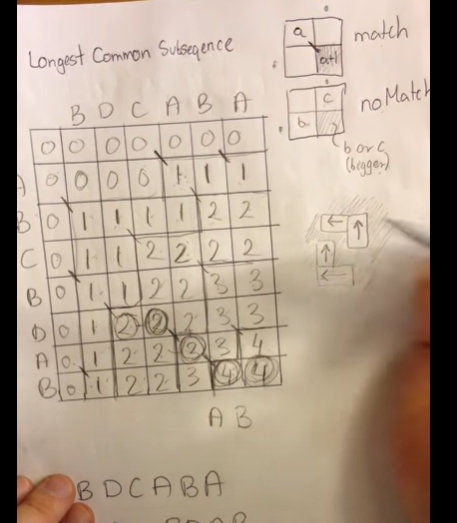

In [49]:
### Using DP techniques 

### Uses the alogrithm in the matrix tabulation table to do this, best if you do the table to understand

### The operations you do in the table will essentially be what you need to convert to syntax to solve the probblem. See picture above

import numpy as np

def dynamic_prog_sol(string_a,string_b):

    len_a = len(string_a)
    len_b = len(string_b)
    
    # create array 
    array = np.zeros(((len_a+1),(len_b+1)),dtype=int)

    # Iterate through the arrays --> algo used here can be seen in the picture
    for i in range(len_a+1):
        for j in range(len_b+1):

            # First row first col is all zeroes
            if i==0 or j ==0:
                array[i][j] = 0
                
            # if letter is a match, according to the algorithm to do the table --> you will +1 to the value from the box diagnally to the top left of it
            elif string_a[i-1] == string_b[j-1]:
                array[i][j] = 1 + array[i-1][j-1]
                
            # if letters are not a match, you will take the bigger value of the index to its left or above it
            else:
                array[i][j]= max(array[i-1][j],array[i][j-1])
   
    # last index value --> it would have the accumulated count
    return array[len_a][len_b]

print(dynamic_prog_sol('dense','condensed'))

5


### Knapsack Problem

- The problem is --> you have a bunch of items that have 2 properties each: weight and value
- The idea is to fit the knapsack with items such that (a) the total weight of the bag does not exceed a certain amount (for example 10kg)
- and (b) the total value of the items in the bag add to the maximised amount

- You can solve this best using dyanamic programming - but we will use the naive solutions first for practivce (recursion and memoization)

In [76]:

# Recursions solely
import time

def knapsack_solver(capacity,weights,values,counter):

    #print(counter)
    
    
    # base case where no more items to check on the list or not enough capacity left
    if counter == 0 or capacity == 0:
        
        output = 0
        return output 

    # check if any of the items weight is above the capacity
    if weights[counter-1] > capacity:
        return knapsack_solver(capacity,weights,values,(counter-1))
    
    else:
        
        #print(values[counter-1])
        new_capacity = capacity - weights[counter-1]
        output_one = values[counter-1] + knapsack_solver(new_capacity,weights,values,(counter-1))
        output_two = knapsack_solver(capacity,weights,values,(counter-1))
        
        output = max(output_one,output_two)

        
        return output

 



capacity= 165
weights= [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
values = [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
counter = len(weights)

start_time = time.time()
print(knapsack_solver(capacity,weights,values,counter))
end_time = time.time()
print(start_time-end_time)


309
-0.0009987354278564453


In [101]:
# recursion using memoization
# cache will store the answer(total value) based on the new capacities

import numpy as np

def knapsack_solver_memoization(capacity,weights,values,counter,memory_cache):

    
    # memory cache will check if problem has been solved for a certain weight (weight here is the capacity val) and if it has not then it will solve it
    # or it will return the value
    if memory_cache[counter][capacity] != -1:
        
        return memory_cache[counter][capacity]
    
    # base case where no more items to check on the list or not enough capacity left
    if counter == 0 or capacity == 0:
        
        
        return 0

    # check if any of the items weight is above the capacity
    if weights[counter-1] > capacity:
        
        memory_cache[counter][capacity] = knapsack_solver_memoization(capacity,weights,values,(counter-1),memory_cache)
    
    else:
        
        new_capacity = capacity - weights[counter - 1]   

        output_one = values[counter - 1] + knapsack_solver_memoization(new_capacity,weights,values,counter - 1,memory_cache)
        output_two = knapsack_solver_memoization(capacity,weights,values,counter - 1,memory_cache)
        

        memory_cache[counter][capacity] = max(output_one,output_two)

    return memory_cache[counter][capacity]

capacity= 165
weights= [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
values = [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
counter = len(weights)

memory_cache = np.full((counter + 1, capacity + 1), -1, dtype=int)
#print(memory_cache)

print(knapsack_solver_memoization(capacity,weights,values,counter,memory_cache))


[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
309


In [112]:
import numpy as np
import time

# Solving kanpsack problem using dynamic programming

def knapsack_dp(capacity,weights,values):


    # value[ith row ,weight]  = max{ value[i-1,w] , value[(i-1),(weight-w[i]) + product_value[i] }

    # Have to create a 2D table to store values:
    value_count = np.zeros(((len(weights)+1),(capacity+1)),dtype= int)
    #print(value_count)
    
    # loop through the whole list to calculate the max values 
    # Three different cases 
    # 1. i=0 or j=0 --> ie we are refering to either the first row or first column which in both cases are zero. If you rmb the tabulation table all
    # these values are zero
    # 2. Never reach required capacity yet
    # 3. Weigh of the object is more than the capacity, so you include the previous values into the box as you cannot accept new item's value

    for i in range (1+len(weights)):
        for j in range (1+capacity):

            if i ==0 or j == 0:
                value_count[i][j]= 0
            
            # comparison to see which item combo will give us max value when the accumulated weight so far is equal or below the capacity
            elif  weights[i-1] <= capacity:
                
                value_one = values[i-1] + value_count[i-1][capacity-weights[i-1]]
                value_two = value_count[i-1][j]

                value_count[i][j]=max(value_one,value_two)
            else:

                value_count[i][j] = value_count[i-1][j]
                

       # with the above method all the tabulation boxes will be filled up. Now return the bottom rightmost value 
    print(value_count)

    return value_count[-1][-1]

# Example usage
capacity = 50
weights = [23, 31, 29, 44, 53, 38, 63, 85, 89, 82]
values = [92, 57, 49, 68, 60, 43, 67, 84, 87, 72]
counter = len(weights)

print(knapsack_dp(capacity,weights,values))




[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92
   92  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92  92
   92  92  92  92  92  92  92  92  92  92  92  92  92  92  92]
 [  0 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149
  149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149 149
  149 149 149 149 149 149 149 149 149 149 149 149 149 149 149]
 [  0 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198
  198 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198 198
  198 198 198 198 198 198 198 198 198 198 198 198 198 198 198]
 [  0 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266
  266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266 266
  266 26

In [106]:
list= [[2,2],[3,3],[4,4]]
print(list[-1])

[4, 4]
